In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

# 고정된 랜덤 시드 설정
np.random.seed(42)

# 데이터 생성
X1 = np.linspace(0, 100, 100)  # X1의 범위를 크게 설정
X2 = np.sin(X1) + 0.5 * X1 + np.random.normal(0, 10, 100)  # 큰 노이즈 추가
# 종속 변수 생성 (y = 2*X1 + 0.1*X2^2 - 10*X2 + 100 + 큰 노이즈 추가)
y = 2 * X1 + 0.1 * (X2 ** 2) - 10 * X2 + 100 + np.random.normal(0, 50, 100)

# 데이터프레임으로 정리
df = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})

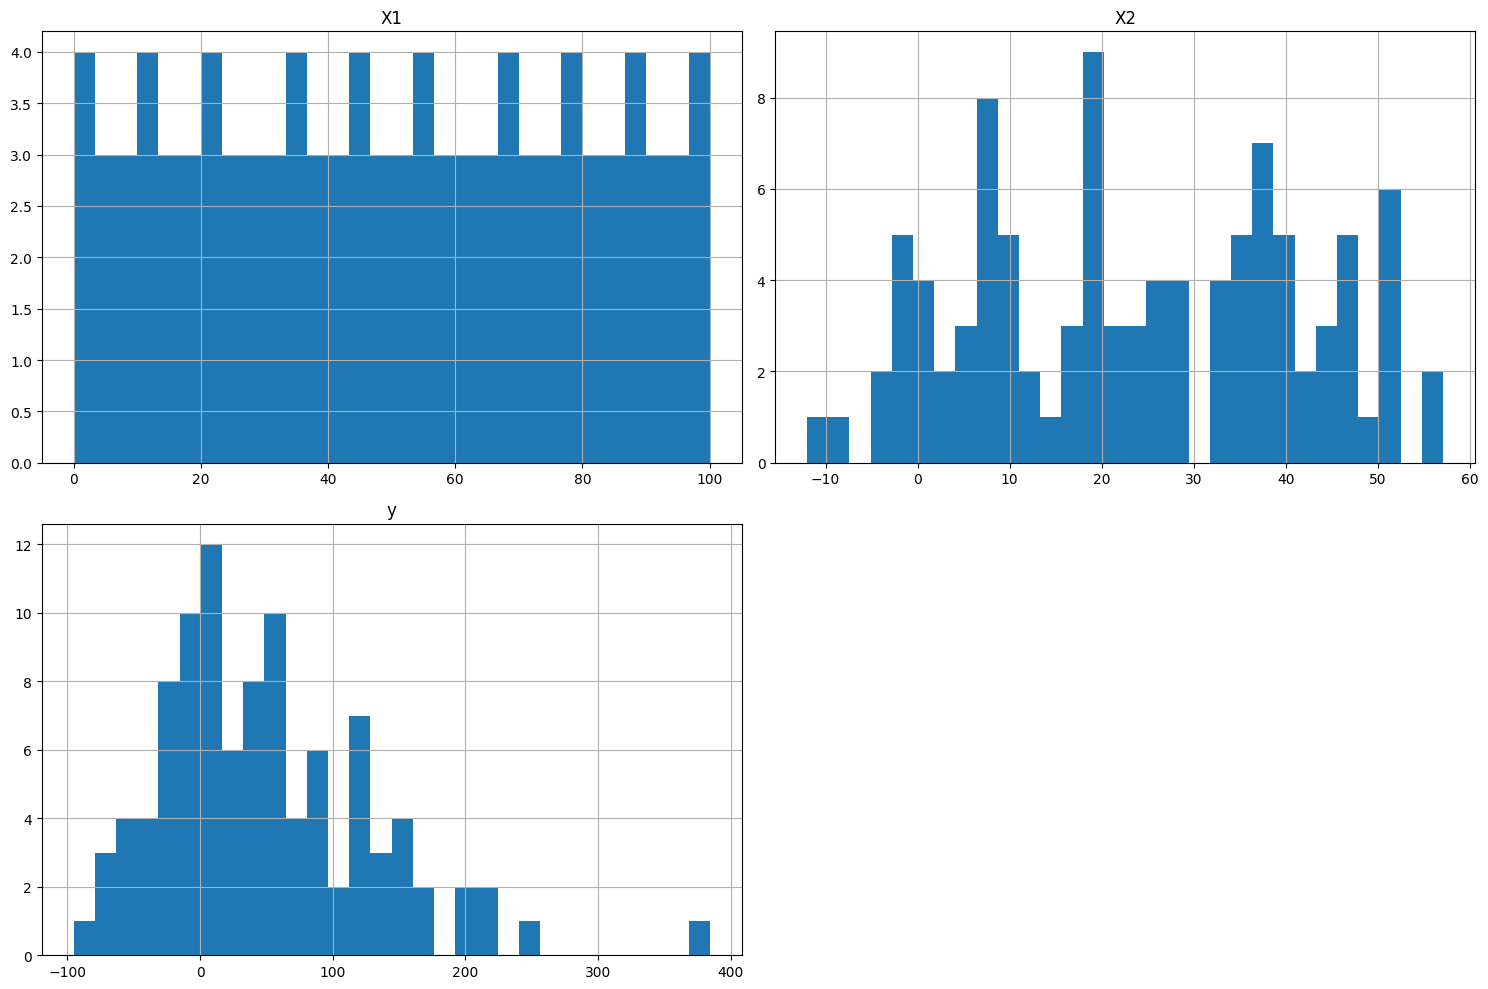

In [2]:
# 히스토그램 예시
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

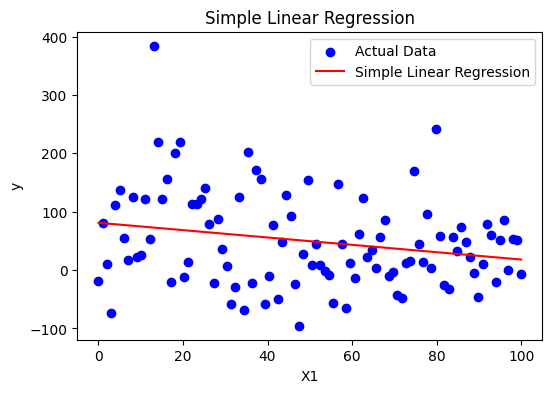

In [3]:
# 1. 단순 선형 회귀 모델 (X1만 사용)
model_simple = LinearRegression()
model_simple.fit(df[['X1']], df['y'])
y_pred_simple = model_simple.predict(df[['X1']])

plt.figure(figsize=(6, 4))
plt.scatter(df['X1'], df['y'], color='blue', label='Actual Data')
plt.plot(df['X1'], y_pred_simple, color='red', label='Simple Linear Regression')
plt.title('Simple Linear Regression')
plt.xlabel('X1')
plt.ylabel('y')
plt.legend()
plt.show()

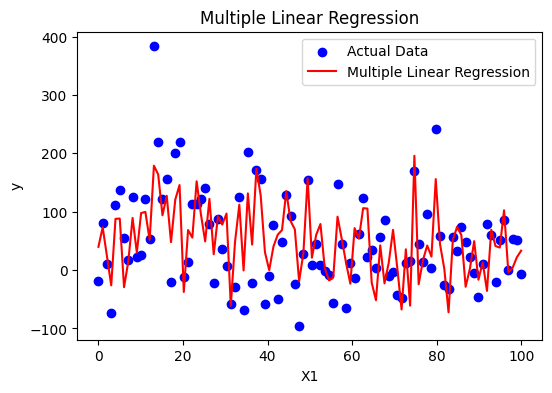

In [4]:
# 2. 다중 선형 회귀 모델
model_multiple = LinearRegression()
model_multiple.fit(df[['X1', 'X2']], df['y'])
y_pred_multiple = model_multiple.predict(df[['X1', 'X2']])

plt.figure(figsize=(6, 4))
plt.scatter(df['X1'], df['y'], color='blue', label='Actual Data')
plt.plot(df['X1'], y_pred_multiple, color='red', label='Multiple Linear Regression')
plt.title('Multiple Linear Regression')
plt.xlabel('X1')
plt.ylabel('y')
plt.legend()
plt.show()

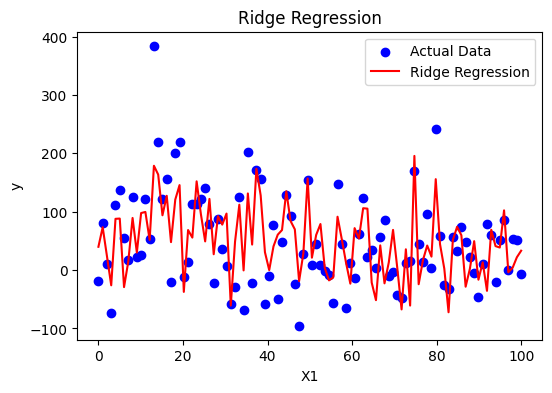

In [6]:
# 3. 릿지 회귀 모델
model_ridge = Ridge(alpha=8.0)
model_ridge.fit(df[['X1', 'X2']], df['y'])
y_pred_ridge = model_ridge.predict(df[['X1', 'X2']])

plt.figure(figsize=(6, 4))
plt.scatter(df['X1'], df['y'], color='blue', label='Actual Data')
plt.plot(df['X1'], y_pred_ridge, color='red', label='Ridge Regression')
plt.title('Ridge Regression')
plt.xlabel('X1')
plt.ylabel('y')
plt.legend()
plt.show()

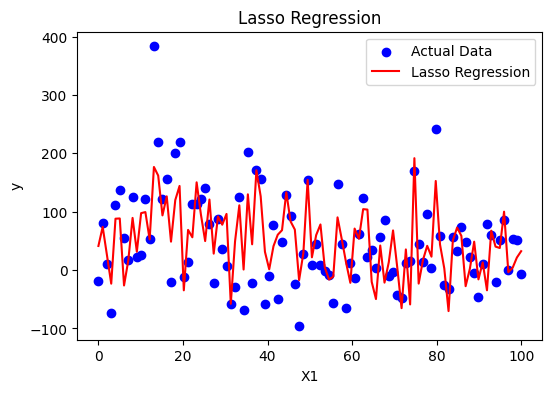

In [7]:
# 4. 라쏘 회귀 모델
model_lasso = Lasso(alpha=8)
model_lasso.fit(df[['X1', 'X2']], df['y'])
y_pred_lasso = model_lasso.predict(df[['X1', 'X2']])

plt.figure(figsize=(6, 4))
plt.scatter(df['X1'], df['y'], color='blue', label='Actual Data')
plt.plot(df['X1'], y_pred_lasso, color='red', label='Lasso Regression')
plt.title('Lasso Regression')
plt.xlabel('X1')
plt.ylabel('y')
plt.legend()
plt.show()

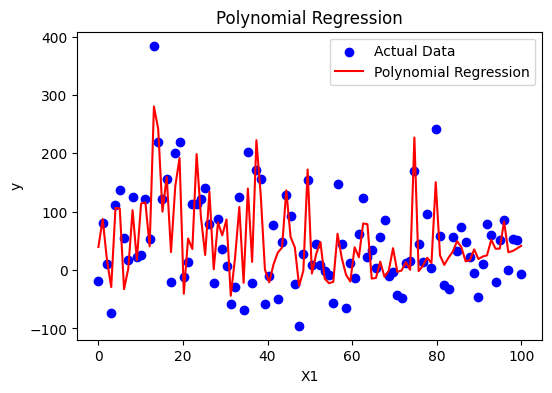

In [8]:
# 5. 다항 회귀 모델 (2차 다항식)
poly_features = PolynomialFeatures(degree=2)
X_poly_transformed = poly_features.fit_transform(df[['X1', 'X2']])
model_poly = LinearRegression()
model_poly.fit(X_poly_transformed, df['y'])
y_pred_poly = model_poly.predict(X_poly_transformed)

plt.figure(figsize=(6, 4))
plt.scatter(df['X1'], df['y'], color='blue', label='Actual Data')
plt.plot(df['X1'], y_pred_poly, color='red', label='Polynomial Regression')
plt.title('Polynomial Regression')
plt.xlabel('X1')
plt.ylabel('y')
plt.legend()
plt.show()

In [9]:
# 결과 출력 (모델별 회귀 계수와 절편)
print("Simple Linear Regression Coefficients:", model_simple.coef_)
print("Multiple Linear Regression Coefficients:", model_multiple.coef_)
print("Ridge Regression Coefficients:", model_ridge.coef_)
print("Lasso Regression Coefficients:", model_lasso.coef_)
print("Polynomial Regression Coefficients:", model_poly.coef_)

Simple Linear Regression Coefficients: [-0.62954195]
Multiple Linear Regression Coefficients: [ 2.55096889 -6.2040901 ]
Ridge Regression Coefficients: [ 2.54698264 -6.1967818 ]
Lasso Regression Coefficients: [ 2.46566837 -6.05623813]
Polynomial Regression Coefficients: [ 0.          2.50309755 -9.93240476  0.01990158 -0.08933862  0.17869237]


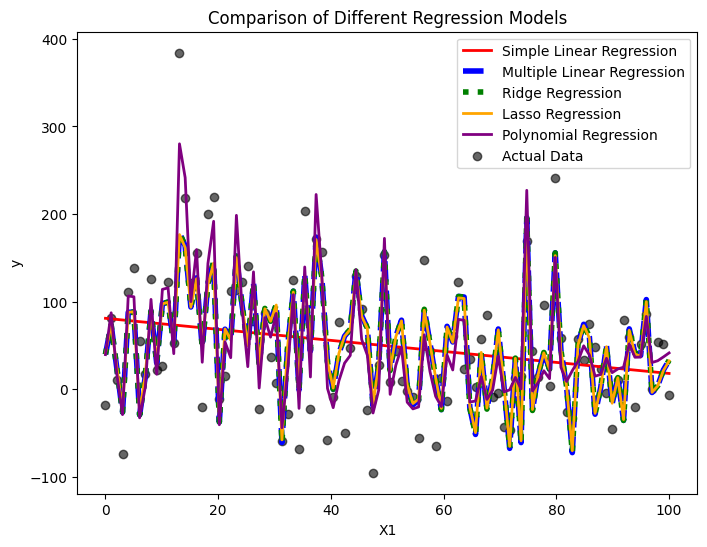

In [10]:
# 결과 비교 시각화
plt.figure(figsize=(8, 6))

# 단순 선형 회귀
plt.plot(df['X1'], y_pred_simple, label='Simple Linear Regression', color='red', linewidth=2)

# 다중 선형 회귀 (선 굵기 증가)
plt.plot(df['X1'], y_pred_multiple, label='Multiple Linear Regression', color='blue', linewidth=4, linestyle='--')

# 릿지 회귀 (선 굵기 증가 및 색상 대비 증가)
plt.plot(df['X1'], y_pred_ridge, label='Ridge Regression', color='green', linewidth=4, linestyle=':')

# 라쏘 회귀
plt.plot(df['X1'], y_pred_lasso, label='Lasso Regression', color='orange', linewidth=2)

# 다항 회귀
plt.plot(df['X1'], y_pred_poly, label='Polynomial Regression', color='purple', linewidth=2)

# 실제 데이터
plt.scatter(df['X1'], df['y'], color='black', label='Actual Data', alpha=0.6)

plt.title('Comparison of Different Regression Models')
plt.xlabel('X1')
plt.ylabel('y')
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 모델별 예측 값
y_pred_simple = model_simple.predict(df[['X1']])
y_pred_multiple = model_multiple.predict(df[['X1', 'X2']])
y_pred_ridge = model_ridge.predict(df[['X1', 'X2']])
y_pred_lasso = model_lasso.predict(df[['X1', 'X2']])
y_pred_poly = model_poly.predict(X_poly_transformed)

# R² 계산
r2_simple = r2_score(df['y'], y_pred_simple)
r2_multiple = r2_score(df['y'], y_pred_multiple)
r2_ridge = r2_score(df['y'], y_pred_ridge)
r2_lasso = r2_score(df['y'], y_pred_lasso)
r2_poly = r2_score(df['y'], y_pred_poly)

# MAE 계산
mae_simple = mean_absolute_error(df['y'], y_pred_simple)
mae_multiple = mean_absolute_error(df['y'], y_pred_multiple)
mae_ridge = mean_absolute_error(df['y'], y_pred_ridge)
mae_lasso = mean_absolute_error(df['y'], y_pred_lasso)
mae_poly = mean_absolute_error(df['y'], y_pred_poly)

# MSE 계산
mse_simple = mean_squared_error(df['y'], y_pred_simple)
mse_multiple = mean_squared_error(df['y'], y_pred_multiple)
mse_ridge = mean_squared_error(df['y'], y_pred_ridge)
mse_lasso = mean_squared_error(df['y'], y_pred_lasso)
mse_poly = mean_squared_error(df['y'], y_pred_poly)

# RMSE 계산
rmse_simple = np.sqrt(mse_simple)
rmse_multiple = np.sqrt(mse_multiple)
rmse_ridge = np.sqrt(mse_ridge)
rmse_lasso = np.sqrt(mse_lasso)
rmse_poly = np.sqrt(mse_poly)

# 결과 출력
print(f"Simple Linear Regression: R²={r2_simple:.3f}, MAE={mae_simple:.3f}, MSE={mse_simple:.3f}, RMSE={rmse_simple:.3f}")
print(f"Multiple Linear Regression: R²={r2_multiple:.3f}, MAE={mae_multiple:.3f}, MSE={mse_multiple:.3f}, RMSE={rmse_multiple:.3f}")
print(f"Ridge Regression: R²={r2_ridge:.3f}, MAE={mae_ridge:.3f}, MSE={mse_ridge:.3f}, RMSE={rmse_ridge:.3f}")
print(f"Lasso Regression: R²={r2_lasso:.3f}, MAE={mae_lasso:.3f}, MSE={mse_lasso:.3f}, RMSE={rmse_lasso:.3f}")
print(f"Polynomial Regression: R²={r2_poly:.3f}, MAE={mae_poly:.3f}, MSE={mse_poly:.3f}, RMSE={rmse_poly:.3f}")


Simple Linear Regression: R²=0.052, MAE=61.374, MSE=6090.229, RMSE=78.040
Multiple Linear Regression: R²=0.544, MAE=42.120, MSE=2929.150, RMSE=54.122
Ridge Regression: R²=0.544, MAE=42.113, MSE=2929.154, RMSE=54.122
Lasso Regression: R²=0.544, MAE=41.997, MSE=2931.022, RMSE=54.139
Polynomial Regression: R²=0.674, MAE=37.582, MSE=2094.748, RMSE=45.768
